In [1]:
#Creating 5000 unique student Synthetic dataset and saving in an Excel file
import pandas as pd
import random
from faker import Faker


fake = Faker()


num_students = 5000
classes = ["A", "B", "C"]


unique_names = set()
while len(unique_names) < num_students:
    unique_names.add(fake.first_name() + " " + fake.last_name())
unique_names = list(unique_names)


data = {
    "student_id": [f"STU{i:05d}" for i in range(1, num_students + 1)],
    "name": unique_names,
    "class": [random.choice(classes) for _ in range(num_students)],
    "comprehension": [random.randint(40, 100) for _ in range(num_students)],
    "attention": [random.randint(30, 100) for _ in range(num_students)],
    "focus": [random.randint(35, 100) for _ in range(num_students)],
    "retention": [random.randint(30, 100) for _ in range(num_students)],
    "assessment_score": [random.randint(40, 100) for _ in range(num_students)],
    "engagement_time": [round(random.uniform(1, 5), 2) for _ in range(num_students)]
}


df = pd.DataFrame(data)


file_name = "synthetic_student_dataset_5000.xlsx"
df.to_excel(file_name, index=False)

print(f"Dataset saved successfully as {file_name}")


Dataset saved successfully as synthetic_student_dataset_5000.xlsx


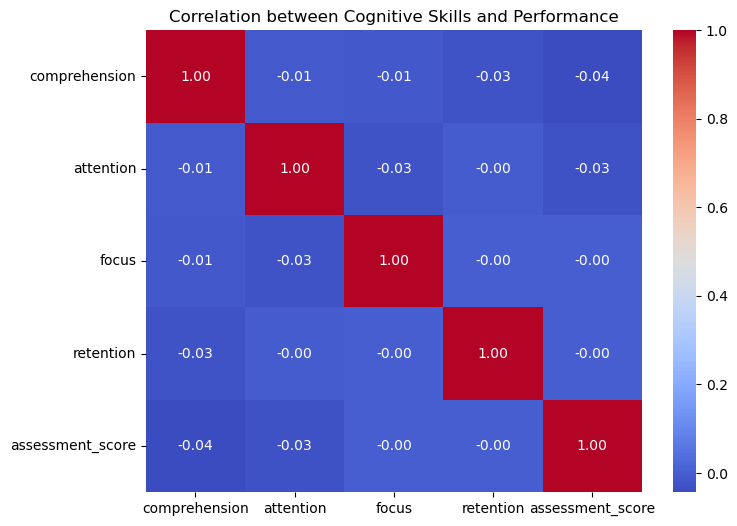

In [2]:
#Analyzing Correlations Between Cognitive Skills and Performance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("synthetic_student_dataset_5000.xlsx")


corr = df[["comprehension", "attention", "focus", "retention", "assessment_score"]].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Cognitive Skills and Performance")
plt.show()


In [3]:
#Simple ML Model to Predict assessment_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: -0.012473826481411932
Random Forest R2: -0.08232568016195896


learning_persona
2    1802
1    1654
0    1544
Name: count, dtype: int64


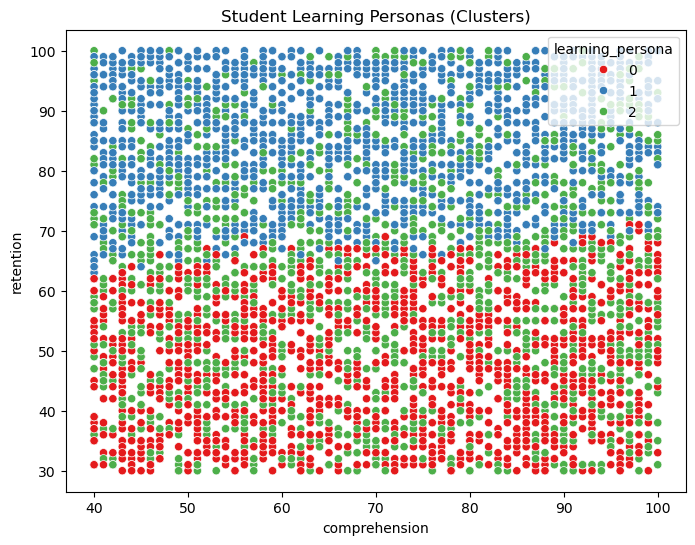

In [4]:
#Cluster Students into Learning Personas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X_cluster = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["learning_persona"] = kmeans.fit_predict(X_scaled)


print(df["learning_persona"].value_counts())


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="comprehension", y="retention", hue="learning_persona", palette="Set1")
plt.title("Student Learning Personas (Clusters)")
plt.show()
